In [25]:
import nilearn.plotting as plotting
import nilearn.image as img
from nilearn.glm import threshold_stats_img
from nilearn.reporting import get_clusters_table
import glob
from decouple import config
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy

In [26]:
task ='fear'
participant = 'B2256'

In [27]:
if 'G' in participant:
    time = 'T1'
else:
    time = 'T2'

path = config(task)
t_images = glob.glob(os.path.join(path, "1stlevel", time, "sub-*", "spmF_0004.nii" ))
dof = glob.glob(os.path.join(path, "1stlevel", time, "sub-*", "beta*.nii" ))
ant_img = img.load_img(f'{path}/preprocessed_{time.lower()}/sub-{participant}/anat/sub-{participant}_space-MNI152NLin2009cAsym_res-2_desc-preproc_T1w.nii.gz')
mask = img.load_img(f'{path}/preprocessed_{time.lower()}/sub-{participant}/func/sub-{participant}_task-{task}_space-MNI152NLin2009cAsym_res-2_desc-brain_mask.nii.gz')
subject_con_image = [scan for scan in t_images if participant in scan][0]
dof = 183 - len([scan for scan in dof if participant in scan]) 
img_prep = img.load_img(subject_con_image) 

# SPM style thresholding
thresholded_map1, threshold1 = threshold_stats_img(
    img_prep,
    mask_img=mask,
    threshold=3.14,
    alpha=.001,
    height_control='fpr',
    cluster_threshold=0,
    two_sided=True,
)

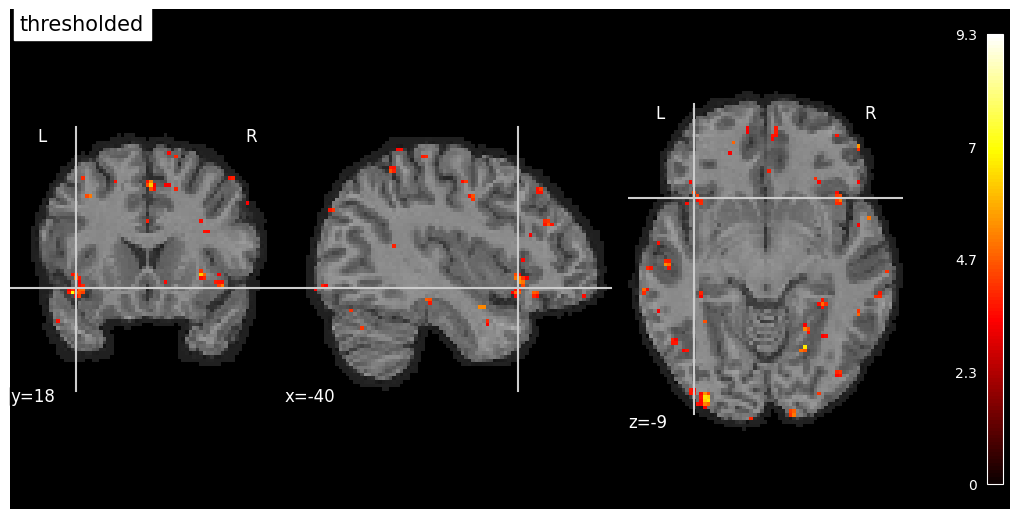

In [28]:
fig = plt.figure(figsize=(10, 5))
plotting.plot_stat_map(
    thresholded_map1,
    bg_img=ant_img,
    threshold=0.0,
    figure=fig,
    black_bg=True,
    title="thresholded"
)

/home/k1812017/envs/neuroimaging/lib/python3.9/site-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



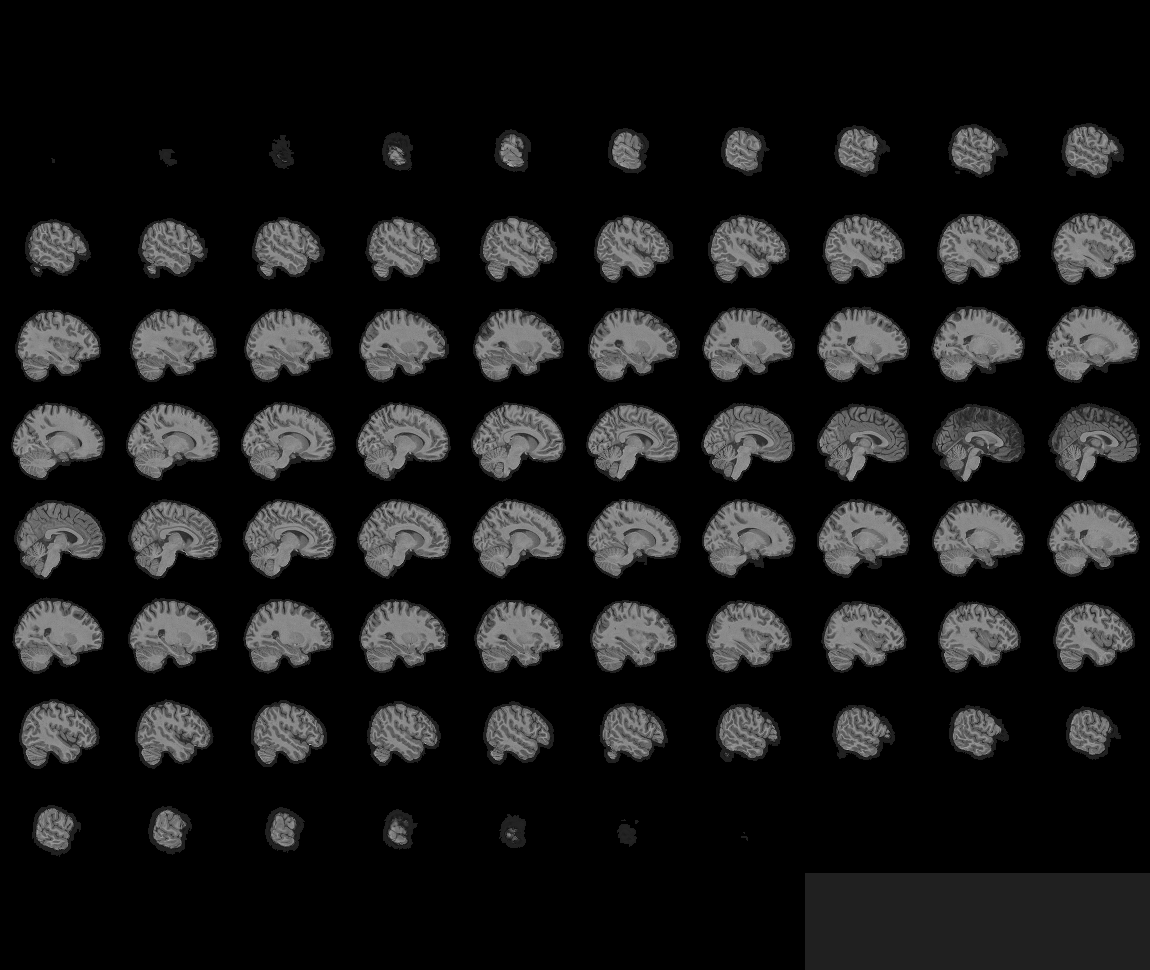
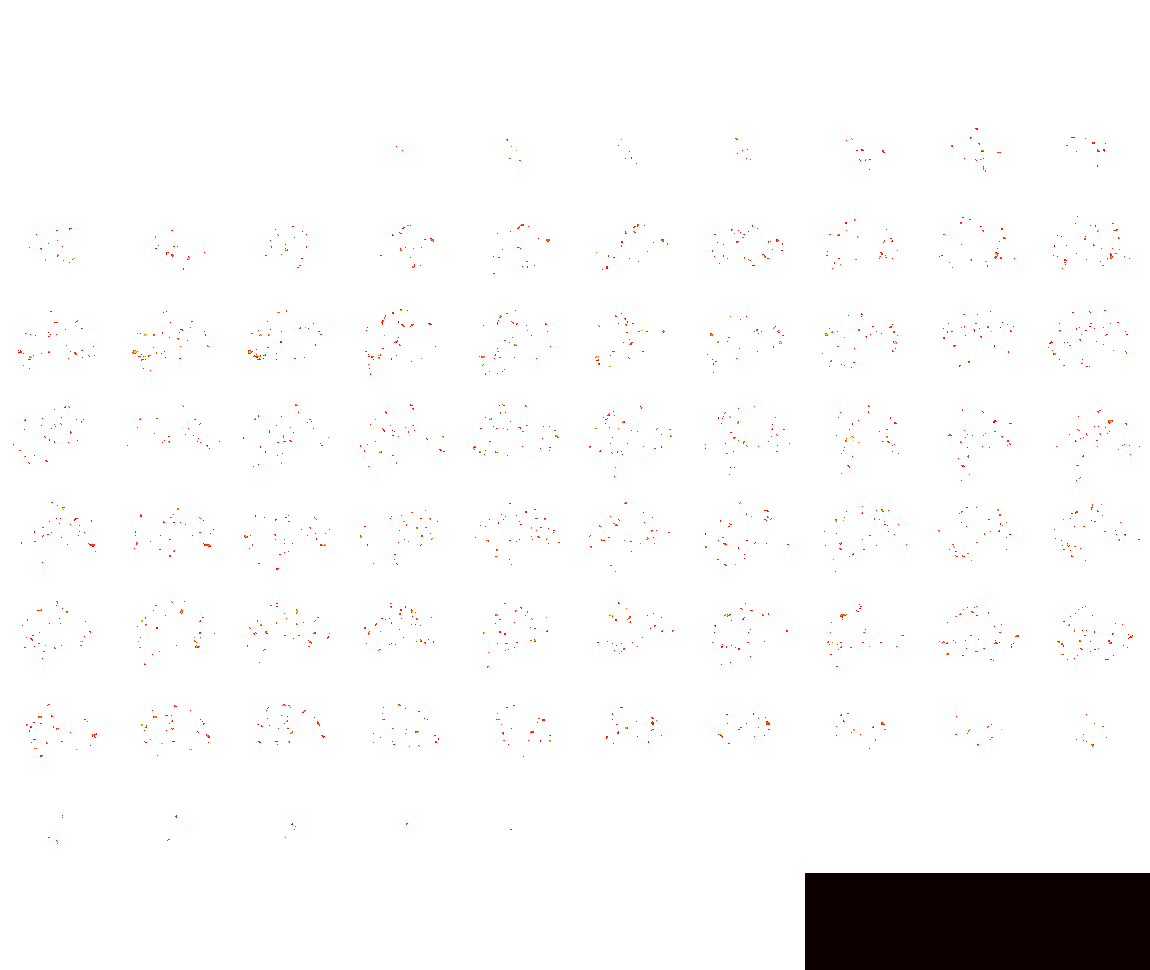

In [29]:
plotting.view_img(thresholded_map1, bg_img=ant_img, cut_coords=(0, 0, 0), title='thresholded')

In [30]:
results_clusters = get_clusters_table(thresholded_map1, stat_threshold=0.0,
                           cluster_threshold=00.0).set_index('Cluster ID', drop=True)

results_clusters['pvals'] = results_clusters['Peak Stat'].apply(lambda t_stat: scipy.stats.t.sf(abs(t_stat), df=dof))
results_clusters

,X,Y,Z,Peak Stat,Cluster Size (mm3),pvals
Cluster ID,,,,,,
1,21.5,-66.5,-6.5,9.304010,136,1.412387e-15
2,-22.5,45.5,11.5,9.065233,144,4.755267e-15
3,-54.5,13.5,-14.5,8.650923,120,3.881030e-14
4,35.5,-60.5,49.5,7.883084,384,1.828603e-12
4a,37.5,-52.5,49.5,6.079945,,1.053317e-08
...,...,...,...,...,...,...
1049,5.5,63.5,25.5,3.293152,8,6.811241e-04
1050,9.5,-30.5,-42.5,3.291901,8,6.838658e-04
1051,57.5,-4.5,-24.5,3.291512,8,6.847211e-04
